In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import time

import warnings
warnings.filterwarnings('ignore')

original_corpus = pd.read_csv('data/mental_health.csv')
cleaned_corpus = pd.read_csv('data/cleaned_mhc.csv')

print("Shape of Original Corpus", original_corpus.shape)
print("Shape of Cleaned Corpus", cleaned_corpus.shape)

Shape of Original Corpus (27977, 2)
Shape of Cleaned Corpus (23240, 2)


In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import time

k_values = [1, 5, 11, 51, 101, 201, 301, 501, 1001, 2001, 5001, 8001]
vectorizer = TfidfVectorizer(max_features=3500)

metrics_original_euclidean = {"K": [], "Training Accuracy": [], "Test Accuracy": [], "Precision": [], "Recall": [], "F1": [], "Test Time (s)": []}
metrics_cleaned_euclidean = {"K": [], "Training Accuracy": [], "Test Accuracy": [], "Precision": [], "Recall": [], "F1": [], "Test Time (s)": []}
metrics_original_cosine = {"K": [], "Training Accuracy": [], "Test Accuracy": [], "Precision": [], "Recall": [], "F1": [], "Test Time (s)": []}
metrics_cleaned_cosine = {"K": [], "Training Accuracy": [], "Test Accuracy": [], "Precision": [], "Recall": [], "F1": [], "Test Time (s)": []}

def run_knn(corpus, target, metrics_dict, dataset_name, metric='euclidean'):
    best_f1 = 0
    best_conf_matrix = None
    best_k = None
    best_test_time = None

    for k in k_values:
        X_train, X_test, y_train, y_test = train_test_split(corpus, target, test_size=0.2, random_state=42)
        vectorizer = TfidfVectorizer(max_features=3500)
        
        X_train_tfidf = vectorizer.fit_transform(X_train)
        X_test_tfidf = vectorizer.transform(X_test)
       
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

        knn.fit(X_train_tfidf, y_train)
        
        start_test = time.perf_counter()
        y_test_pred = knn.predict(X_test_tfidf)
        test_time = time.perf_counter() - start_test
        
        y_train_pred = knn.predict(X_train_tfidf)
        
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        prec = precision_score(y_test, y_test_pred)
        rec = recall_score(y_test, y_test_pred)
        f1 = f1_score(y_test, y_test_pred)
        
        metrics_dict["K"].append(k)
        metrics_dict["Training Accuracy"].append(train_acc)
        metrics_dict["Test Accuracy"].append(test_acc)
        metrics_dict["Precision"].append(prec)
        metrics_dict["Recall"].append(rec)
        metrics_dict["F1"].append(f1)
        metrics_dict["Test Time (s)"].append(test_time)

        if f1 > best_f1:
            best_f1 = f1
            best_conf_matrix = confusion_matrix(y_test, y_test_pred)
            best_k = k
            best_test_time = test_time
        print(f"Finished for {dataset_name} with k = {k}")
    

    print(f"Best F1 Score for {dataset_name} Corpus (k={best_k}, metric={metric}): {best_f1:.4f}, "
          f"Test time: {best_test_time:.4f} s")
    print("Confusion Matrix:\n", best_conf_matrix)

run_knn(original_corpus['text'], original_corpus['label'], metrics_original_euclidean, "Original", metric='euclidean')
run_knn(cleaned_corpus['text'], cleaned_corpus['label'], metrics_cleaned_euclidean, "Cleaned", metric='euclidean')
run_knn(original_corpus['text'], original_corpus['label'], metrics_original_cosine, "Original", metric='cosine')
run_knn(cleaned_corpus['text'], cleaned_corpus['label'], metrics_cleaned_cosine, "Cleaned", metric='cosine')

df_original_euclidean = pd.DataFrame(metrics_original_euclidean)
df_cleaned_euclidean = pd.DataFrame(metrics_cleaned_euclidean)
df_original_cosine = pd.DataFrame(metrics_original_cosine)
df_cleaned_cosine = pd.DataFrame(metrics_cleaned_cosine)

print("\nMetrics for Original Corpus with Euclidean Distance:\n", df_original_euclidean)
print("\nMetrics for Cleaned Corpus with Euclidean Distance:\n", df_cleaned_euclidean)
print("\nMetrics for Original Corpus with Cosine Distance:\n", df_original_cosine)
print("\nMetrics for Cleaned Corpus with Cosine Distance:\n", df_cleaned_cosine)

Finished for Original with k = 1
Finished for Original with k = 5
Finished for Original with k = 11
Finished for Original with k = 51
Finished for Original with k = 101
Finished for Original with k = 201
Finished for Original with k = 301
Finished for Original with k = 501
Finished for Original with k = 1001
Finished for Original with k = 2001
Finished for Original with k = 5001
Finished for Original with k = 8001
Best F1 Score for Original Corpus (k=201, metric=euclidean): 0.8837, Test time: 3.9008 s
Confusion Matrix:
 [[2275  527]
 [ 165 2629]]
Finished for Cleaned with k = 1
Finished for Cleaned with k = 5
Finished for Cleaned with k = 11
Finished for Cleaned with k = 51
Finished for Cleaned with k = 101
Finished for Cleaned with k = 201
Finished for Cleaned with k = 301
Finished for Cleaned with k = 501
Finished for Cleaned with k = 1001
Finished for Cleaned with k = 2001
Finished for Cleaned with k = 5001
Finished for Cleaned with k = 8001
Best F1 Score for Cleaned Corpus (k=51, m

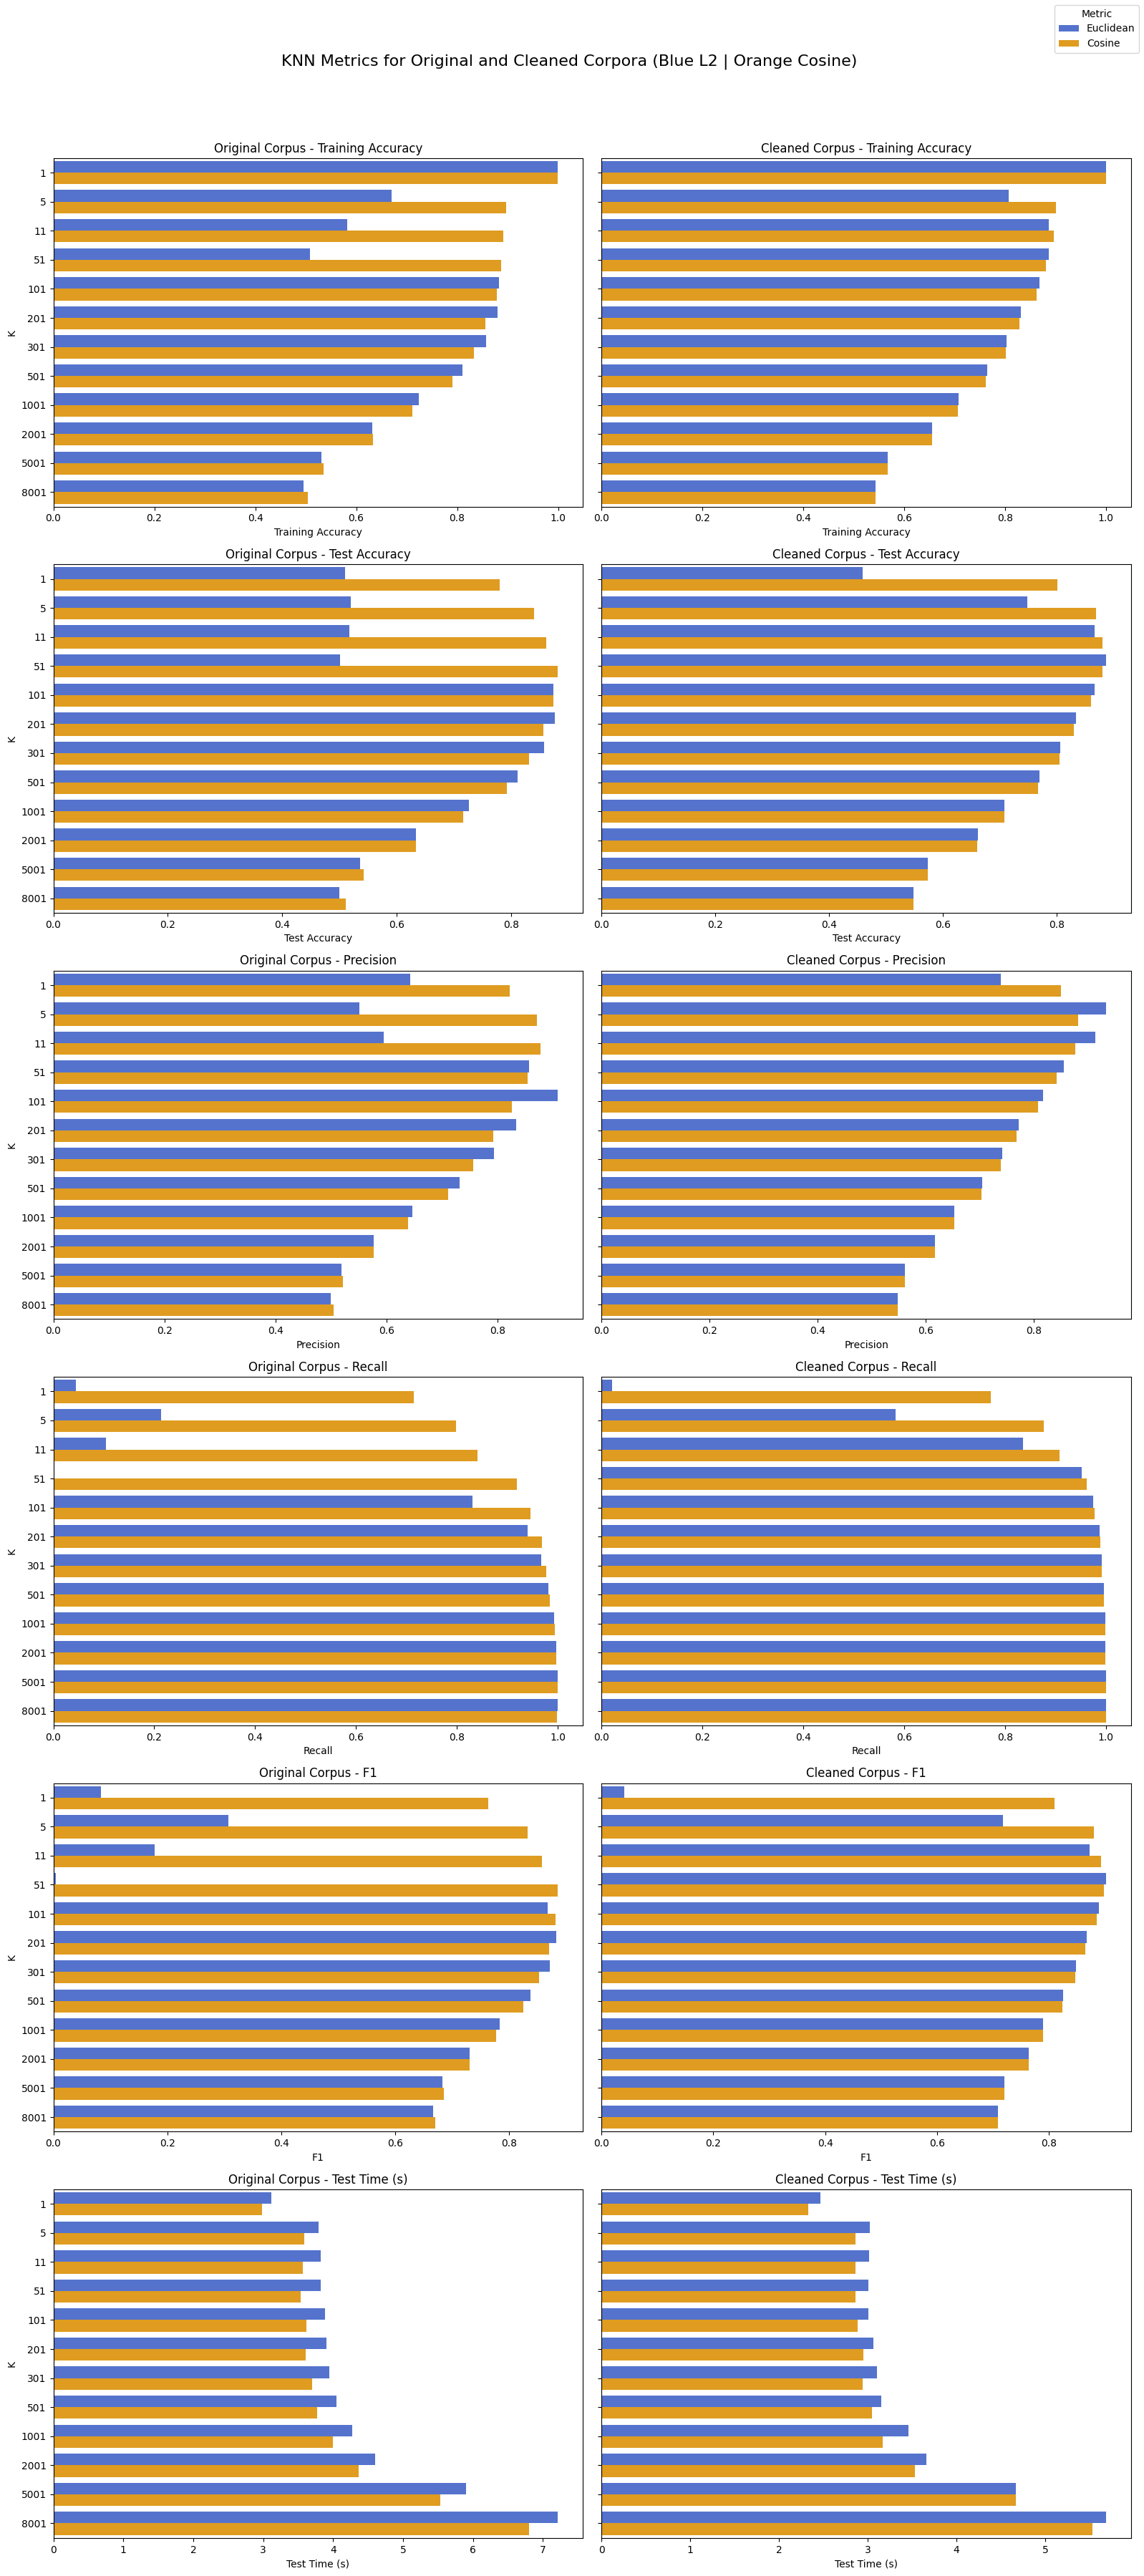

In [3]:
metrics_to_plot = ["Training Accuracy", "Test Accuracy", "Precision", "Recall", "F1", "Test Time (s)"]

df_original_euclidean["Metric"] = "Euclidean"
df_original_cosine["Metric"] = "Cosine"
df_original_combined = pd.concat([df_original_euclidean, df_original_cosine])

df_cleaned_euclidean["Metric"] = "Euclidean"
df_cleaned_cosine["Metric"] = "Cosine"
df_cleaned_combined = pd.concat([df_cleaned_euclidean, df_cleaned_cosine])

fig, axes = plt.subplots(len(metrics_to_plot), 2, figsize=(16, 36), sharey=True)
fig.suptitle("KNN Metrics for Original and Cleaned Corpora (Blue L2 | Orange Cosine)", fontsize=16)

for i, metric in enumerate(metrics_to_plot):
    sns.barplot(ax=axes[i, 0], y="K", x=metric, hue="Metric", data=df_original_combined, orient='h', 
                palette={"Euclidean": "royalblue", "Cosine": "orange"})
    axes[i, 0].set_title(f"Original Corpus - {metric}")
    axes[i, 0].get_legend().remove()

    sns.barplot(ax=axes[i, 1], y="K", x=metric, hue="Metric", data=df_cleaned_combined, orient='h', 
                palette={"Euclidean": "royalblue", "Cosine": "orange"})
    axes[i, 1].set_title(f"Cleaned Corpus - {metric}")
    axes[i, 1].get_legend().remove()

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", title="Metric")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('plots/knn_results.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
metrics_to_display = ["Training Accuracy", "Test Accuracy", "Precision", "Recall", "F1", "Test Time (s)"]

original_data = {}
for metric in metrics_to_display:
    if metric == "K":
        original_data[("K", "")] = df_original_euclidean["K"]
    else:
        original_data[(metric, "Euclidean")] = df_original_euclidean[metric].round(3)
        original_data[(metric, "Cosine")] = df_original_cosine[metric].round(3)

cleaned_data = {}
for metric in metrics_to_display:
    if metric == "K":
        cleaned_data[("K", "")] = df_cleaned_euclidean["K"]
    else:
        cleaned_data[(metric, "Euclidean")] = df_cleaned_euclidean[metric].round(3)
        cleaned_data[(metric, "Cosine")] = df_cleaned_cosine[metric].round(3)

df_original_combined = pd.DataFrame(original_data)
df_cleaned_combined = pd.DataFrame(cleaned_data)

def apply_dual_heatmap_combined(table):
    styled_table = table.style
    
    styled_table = styled_table.format("{:.3f}", subset=[(col, subtype) for col, subtype in table.columns 
                                                        if col != "K" and subtype != ""])
    
    for metric in metrics_to_display:
        if metric != "K":
            styled_table = styled_table.background_gradient(
                cmap="YlGnBu",
                subset=[(metric, "Euclidean")]
            )
            styled_table = styled_table.background_gradient(
                cmap="OrRd",
                subset=[(metric, "Cosine")]
            )
    
    styled_table = styled_table.set_properties(**{
        'border-collapse': 'collapse'
    })
    
    return styled_table

print("Metrics Table for Original Corpus (Combined Euclidean and Cosine):")
display(apply_dual_heatmap_combined(df_original_combined))

print("\nMetrics Table for Cleaned Corpus (Combined Euclidean and Cosine):")
display(apply_dual_heatmap_combined(df_cleaned_combined))

Metrics Table for Original Corpus (Combined Euclidean and Cosine):



Metrics Table for Cleaned Corpus (Combined Euclidean and Cosine):


In [7]:
from sklearn.decomposition import TruncatedSVD

k_values = [1, 5, 11, 51, 101, 201, 301, 501, 1001, 2001, 5001, 8001]
vectorizer = TfidfVectorizer(max_features=3500)

lsa_metrics_original_euclidean = {"K": [], "Training Accuracy": [], "Test Accuracy": [], "Precision": [], "Recall": [], "F1": [], "Test Time (s)": []}
lsa_metrics_cleaned_euclidean = {"K": [], "Training Accuracy": [], "Test Accuracy": [], "Precision": [], "Recall": [], "F1": [], "Test Time (s)": []}
lsa_metrics_original_cosine = {"K": [], "Training Accuracy": [], "Test Accuracy": [], "Precision": [], "Recall": [], "F1": [], "Test Time (s)": []}
lsa_metrics_cleaned_cosine = {"K": [], "Training Accuracy": [], "Test Accuracy": [], "Precision": [], "Recall": [], "F1": [], "Test Time (s)": []}

def run_knn_lsa(corpus, target, lsa_metrics_dict, dataset_name, metric='euclidean'):
    best_f1 = 0
    best_conf_matrix = None
    best_k = None
    best_test_time = None

    X_train, X_test, y_train, y_test = train_test_split(corpus, target, test_size=0.2, random_state=42)
    vectorizer = TfidfVectorizer(max_features=3500)

    n_components = 150
    lsa = TruncatedSVD(n_components=n_components, random_state=42)
        
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_train_lsa = lsa.fit_transform(X_train_tfidf)    
    X_test_tfidf = vectorizer.transform(X_test)
    X_test_lsa = lsa.transform(X_test_tfidf)
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

        knn.fit(X_train_lsa, y_train)
        
        start_test = time.perf_counter()
        y_test_pred = knn.predict(X_test_lsa)
        test_time = time.perf_counter() - start_test
        
        y_train_pred = knn.predict(X_train_lsa)
        
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        prec = precision_score(y_test, y_test_pred)
        rec = recall_score(y_test, y_test_pred)
        f1 = f1_score(y_test, y_test_pred)
        
        lsa_metrics_dict["K"].append(k)
        lsa_metrics_dict["Training Accuracy"].append(train_acc)
        lsa_metrics_dict["Test Accuracy"].append(test_acc)
        lsa_metrics_dict["Precision"].append(prec)
        lsa_metrics_dict["Recall"].append(rec)
        lsa_metrics_dict["F1"].append(f1)
        lsa_metrics_dict["Test Time (s)"].append(test_time)

        print(f"Finished for {dataset_name} with k = {k}")

        if f1 > best_f1:
            best_f1 = f1
            best_conf_matrix = confusion_matrix(y_test, y_test_pred)
            best_k = k
            best_test_time = test_time

    print(f"Best F1 Score for {dataset_name} Corpus (k={best_k}, metric={metric}): {best_f1:.4f}, "
          f"Test time: {best_test_time:.4f} s")
    print("Confusion Matrix:\n", best_conf_matrix)

run_knn_lsa(original_corpus['text'], original_corpus['label'], lsa_metrics_original_euclidean, "Original", metric='euclidean')
run_knn_lsa(cleaned_corpus['text'], cleaned_corpus['label'], lsa_metrics_cleaned_euclidean, "Cleaned", metric='euclidean')
run_knn_lsa(original_corpus['text'], original_corpus['label'], lsa_metrics_original_cosine, "Original", metric='cosine')
run_knn_lsa(cleaned_corpus['text'], cleaned_corpus['label'], lsa_metrics_cleaned_cosine, "Cleaned", metric='cosine')

df_lsa_original_euclidean = pd.DataFrame(lsa_metrics_original_euclidean)
df_lsa_cleaned_euclidean = pd.DataFrame(lsa_metrics_cleaned_euclidean)
df_lsa_original_cosine = pd.DataFrame(lsa_metrics_original_cosine)
df_lsa_cleaned_cosine = pd.DataFrame(lsa_metrics_cleaned_cosine)

print("\nMetrics for Original Corpus with LSA (Euclidean Distance):\n", df_lsa_original_euclidean)
print("\nMetrics for Cleaned Corpus with LSA (Euclidean Distance):\n", df_lsa_cleaned_euclidean)
print("\nMetrics for Original Corpus with LSA (Cosine Distance):\n", df_lsa_original_cosine)
print("\nMetrics for Cleaned Corpus with LSA (Cosine Distance):\n", df_lsa_cleaned_cosine)

Finished for Original with k = 1
Finished for Original with k = 5
Finished for Original with k = 11
Finished for Original with k = 51
Finished for Original with k = 101
Finished for Original with k = 201
Finished for Original with k = 301
Finished for Original with k = 501
Finished for Original with k = 1001
Finished for Original with k = 2001
Finished for Original with k = 5001
Finished for Original with k = 8001
Best F1 Score for Original Corpus (k=1, metric=euclidean): 0.7006, Test time: 0.4565 s
Confusion Matrix:
 [[2523  279]
 [1137 1657]]
Finished for Cleaned with k = 1
Finished for Cleaned with k = 5
Finished for Cleaned with k = 11
Finished for Cleaned with k = 51
Finished for Cleaned with k = 101
Finished for Cleaned with k = 201
Finished for Cleaned with k = 301
Finished for Cleaned with k = 501
Finished for Cleaned with k = 1001
Finished for Cleaned with k = 2001
Finished for Cleaned with k = 5001
Finished for Cleaned with k = 8001
Best F1 Score for Cleaned Corpus (k=1, metr

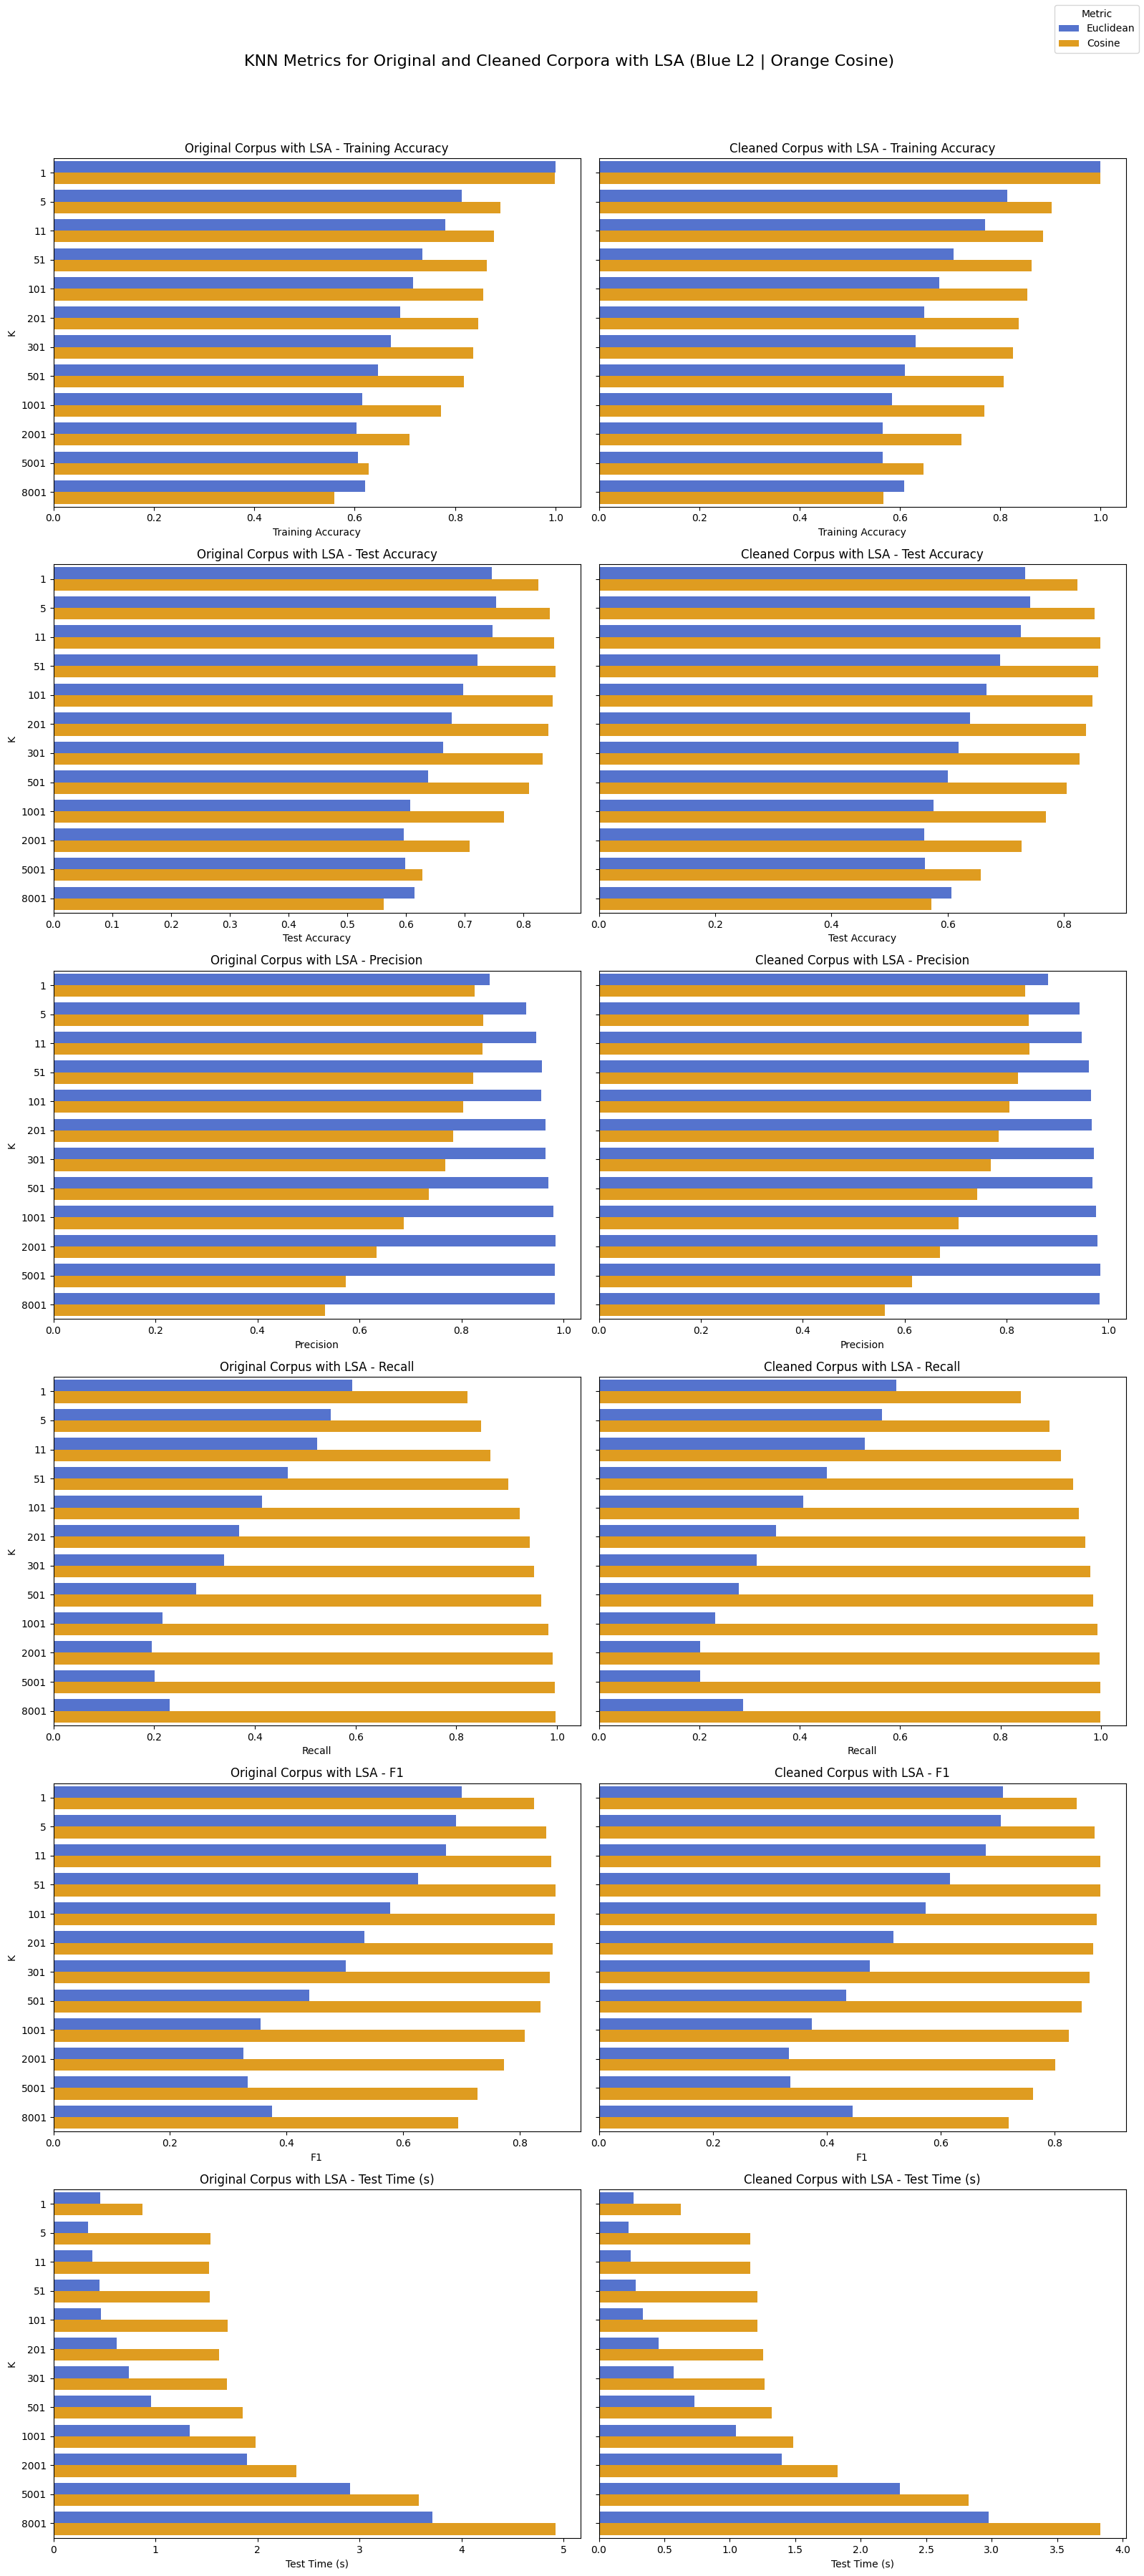

In [8]:
metrics_to_plot = ["Training Accuracy", "Test Accuracy", "Precision", "Recall", "F1", "Test Time (s)"]

df_lsa_original_euclidean["Metric"] = "Euclidean"
df_lsa_original_cosine["Metric"] = "Cosine"
df_lsa_original_combined = pd.concat([df_lsa_original_euclidean, df_lsa_original_cosine])

df_lsa_cleaned_euclidean["Metric"] = "Euclidean"
df_lsa_cleaned_cosine["Metric"] = "Cosine"
df_lsa_cleaned_combined = pd.concat([df_lsa_cleaned_euclidean, df_lsa_cleaned_cosine])

fig, axes = plt.subplots(len(metrics_to_plot), 2, figsize=(16, 36), sharey=True)
fig.suptitle("KNN Metrics for Original and Cleaned Corpora with LSA (Blue L2 | Orange Cosine)", fontsize=16)

for i, metric in enumerate(metrics_to_plot):
    sns.barplot(ax=axes[i, 0], y="K", x=metric, hue="Metric", data=df_lsa_original_combined, orient='h', 
                palette={"Euclidean": "royalblue", "Cosine": "orange"})
    axes[i, 0].set_title(f"Original Corpus with LSA - {metric}")
    axes[i, 0].get_legend().remove()

    sns.barplot(ax=axes[i, 1], y="K", x=metric, hue="Metric", data=df_lsa_cleaned_combined, orient='h', 
                palette={"Euclidean": "royalblue", "Cosine": "orange"})
    axes[i, 1].set_title(f"Cleaned Corpus with LSA - {metric}")
    axes[i, 1].get_legend().remove()

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", title="Metric")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [9]:
metrics_to_display = ["Training Accuracy", "Test Accuracy", "Precision", "Recall", "F1", "Test Time (s)"]

original_lsa_data = {}
for metric in metrics_to_display:
    if metric == "K":
        original_lsa_data[("K", "")] = df_lsa_original_euclidean["K"]
    else:
        original_lsa_data[(metric, "Euclidean")] = df_lsa_original_euclidean[metric].round(3)
        original_lsa_data[(metric, "Cosine")] = df_lsa_original_cosine[metric].round(3)

cleaned_lsa_data = {}
for metric in metrics_to_display:
    if metric == "K":
        cleaned_lsa_data[("K", "")] = df_lsa_cleaned_euclidean["K"]
    else:
        cleaned_lsa_data[(metric, "Euclidean")] = df_lsa_cleaned_euclidean[metric].round(3)
        cleaned_lsa_data[(metric, "Cosine")] = df_lsa_cleaned_cosine[metric].round(3)

df_lsa_original_combined = pd.DataFrame(original_lsa_data)
df_lsa_cleaned_combined = pd.DataFrame(cleaned_lsa_data)

print("Metrics Table for Original Corpus with LSA (Combined Euclidean and Cosine):")
display(apply_dual_heatmap_combined(df_lsa_original_combined))

print("\nMetrics Table for Cleaned Corpus with LSA (Combined Euclidean and Cosine):")
display(apply_dual_heatmap_combined(df_lsa_cleaned_combined))

Metrics Table for Original Corpus with LSA (Combined Euclidean and Cosine):



Metrics Table for Cleaned Corpus with LSA (Combined Euclidean and Cosine):
